<a href="https://colab.research.google.com/github/qhungbui7/some-analytics/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Full name: Bùi Quốc Hùng <br>
Student ID: 20127508

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/data/a10.csv /content/a10.csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from time import time
import seaborn as sns

In [4]:
# data_df = pd.read_csv("data.csv")
data_df = pd.read_csv("/content/a10.csv")
data_df

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


# Problems with ARIMA

Autoregressive Integrated Moving Average, or ARIMA, is a model using to learn the pattern of time series data (univariate data).

It supports both an autoregressive and moving average elements. The integrated element refers to differencing allowing the method to support time series data with a trend.

ARIMA it does not support seasonal data - time series having some repeating cycles.


# What is SARIMA


SARIMA, short for Seasonal Autoregressive Integrated Moving Average, represents an enhancement of ARIMA designed explicitly for univariate time series data having a seasonal pattern.

This model introduces three additional hyperparameters to define the seasonal autoregression (AR), differencing (I), and moving average (MA) components of the series.
- Additionally, it includes an extra parameter to indicate the duration of the seasonal pattern.


# Model Parameter explanations

## Trend Elements
3 trend elements, the same as the ARIMA model:

- p: Trend autoregression order.
- d: Trend difference order.
- q: Trend moving average order.

## Seasonal Elements

4 seasonal elements that are not part of ARIMA:

- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period.


## statsmodels.tsa.statespace.sarimax.SARIMAX hyperparameter explanation

1. endog: array
   - The observed time-series process.

2. order: typle
   - The (p, d, q) order of the non-seasonal component.
   - p: AR order, d: Integration order, q: MA order.

3. seasonal_order: tuple
   - The (P, D, Q, s) order of the seasonal component.
   - P: Seasonal AR order, D: Seasonal integration order, Q: Seasonal MA order, s: Seasonal periodicity.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


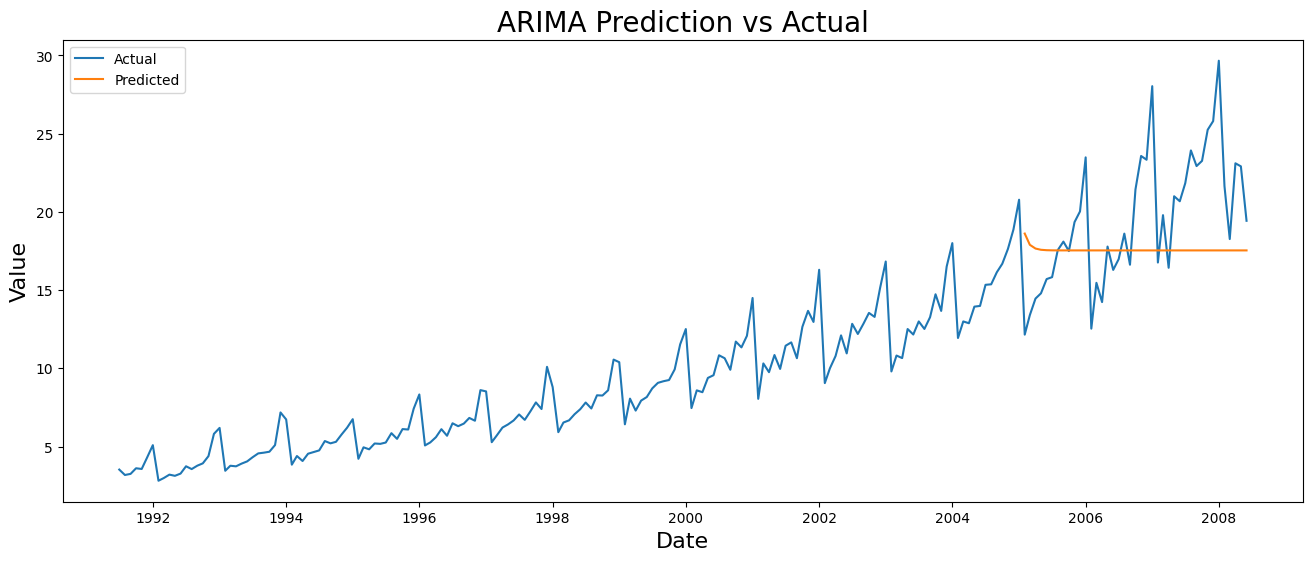

In [5]:
data_df['date'] = pd.to_datetime(data_df['date'])

split_index = int(len(data_df) * 0.8)

train_data = data_df.iloc[:split_index]
test_data = data_df.iloc[split_index:]

order = (1, 1, 1)
arima_model = ARIMA(train_data['value'], order=order)
arima_results = arima_model.fit()

predictions = arima_results.predict(start=split_index, end=len(data_df)-1, dynamic=False, typ='levels')

plt.figure(figsize=(16, 6))
sns.lineplot(x=data_df['date'], y=data_df['value'], label="Actual")
sns.lineplot(x=test_data['date'], y=predictions, label="Predicted")

plt.title('ARIMA Prediction vs Actual', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend()
plt.show()


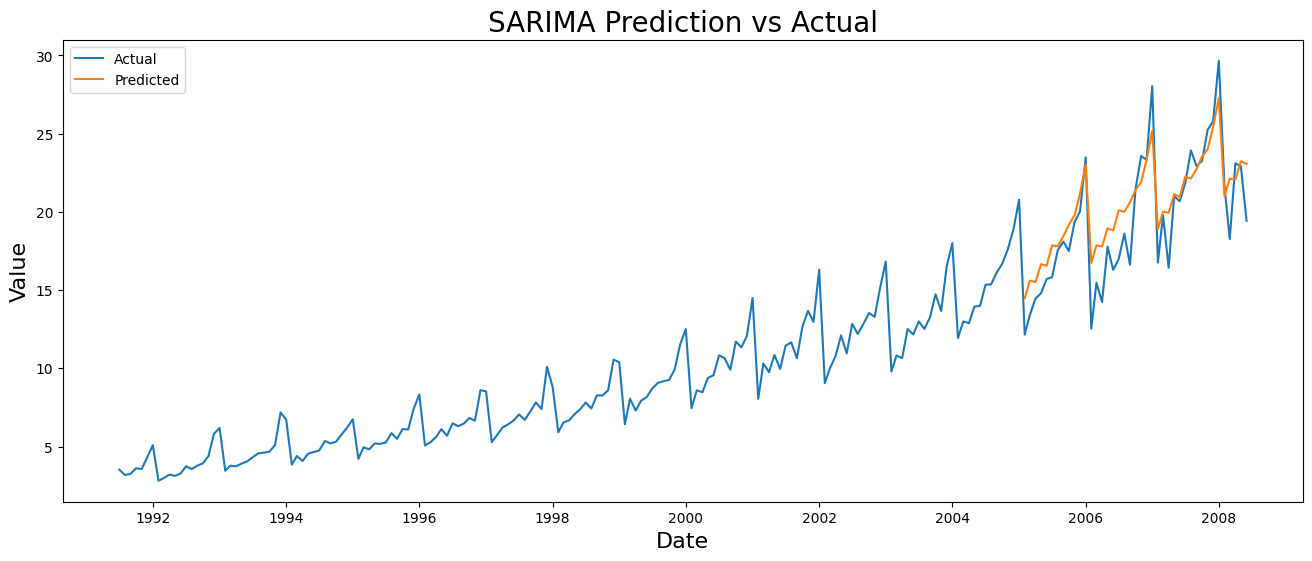

In [6]:
data_df['date'] = pd.to_datetime(data_df['date'])

split_index = int(len(data_df) * 0.8)

train_data = data_df.iloc[:split_index]
test_data = data_df.iloc[split_index:]

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
sarima_model = SARIMAX(train_data['value'], order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

predictions = sarima_results.get_forecast(steps=len(test_data))
predicted_values = predictions.predicted_mean

plt.figure(figsize=(16, 6))
sns.lineplot(x=data_df['date'], y=data_df['value'], label="Actual")
sns.lineplot(x=test_data['date'], y=predicted_values, label="Predicted")

plt.title('SARIMA Prediction vs Actual', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.legend()
plt.show()


We can easily observe than SARIMA is better in this case